###Machine Learning Problem 2 Classification
###Aaron McCarley
###CS430-ON
###Machine Learning in the Cloud

###Importing libraries and Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix as plot_cm
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank.csv')

###Get Dimensions

In [ ]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 4521.


In [ ]:
test_df.head()

,job,day,month,duration,campaign,pdays,previous,Outcome
0,unemployed,19,oct,79,1,-1,0,no
1,services,11,may,220,1,339,4,no
2,management,16,apr,185,1,330,1,no
3,management,3,jun,199,4,-1,0,no
4,blue-collar,5,may,226,1,-1,0,no


In [ ]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 4521.


In [ ]:
train_df.isnull().sum()

job         0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
Outcome     0
dtype: int64

In [ ]:
print('Percent of missing "duration" records is %.2f%%' %((train_df['duration'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "duration" records is 0.00%


###Mean duration and median duration spent with the bank

In [ ]:
print('The mean of the duration is %.2f' %(train_df["duration"].mean(skipna=True)))
print('The median of the duration is %.2f' %(train_df["duration"].median(skipna=True)))

The mean of the duration is 263.96
The median of the duration is 185.00


In [ ]:
train_data = train_df.copy()
train_data["duration"].fillna(train_df["duration"].median(skipna=True), inplace=True)
train_data["pdays"].fillna(train_df['pdays'].value_counts().idxmax(), inplace=True)
train_data.drop('campaign', axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

job         0
day         0
month       0
duration    0
pdays       0
previous    0
Outcome     0
dtype: int64

In [ ]:
train_data.head()

,job,day,month,duration,pdays,previous,Outcome
0,unemployed,19,oct,79,-1,0,no
1,services,11,may,220,339,4,no
2,management,16,apr,185,330,1,no
3,management,3,jun,199,-1,0,no
4,blue-collar,5,may,226,-1,0,no


In [ ]:
test_data = test_df.copy()
test_data["duration"].fillna(train_df["duration"].median(skipna=True), inplace=True)
test_data["pdays"].fillna(train_df["pdays"].median(skipna=True), inplace=True)
test_data.drop('Outcome', axis=1, inplace=True)

test_data['Banking']=np.where((test_data["duration"]+test_data["previous"])>0, 0, 1)

testing = pd.get_dummies(test_data, columns=["pdays","duration","previous"])

final_test = testing
final_test.head()

,job,day,month,campaign,Banking,pdays_-1,pdays_1,pdays_2,pdays_3,pdays_5,...,previous_14,previous_15,previous_17,previous_18,previous_19,previous_20,previous_22,previous_23,previous_24,previous_25
0,unemployed,19,oct,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,services,11,may,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,management,16,apr,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,management,3,jun,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,blue-collar,5,may,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = final_test.drop('month',axis=1)
X_test

,job,day,campaign,Banking,pdays_-1,pdays_1,pdays_2,pdays_3,pdays_5,pdays_7,...,previous_14,previous_15,previous_17,previous_18,previous_19,previous_20,previous_22,previous_23,previous_24,previous_25
0,unemployed,19,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,services,11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,management,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,management,3,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,blue-collar,5,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,30,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4517,self-employed,9,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4518,technician,19,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,blue-collar,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####Assign X and y values.

In [ ]:
X1 = final_test.iloc[:,0:-1]
Y_train = final_test['job']

###Split the data into Train/Test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

###Transform the Columns

In [ ]:
num_attribs = ['day', 'Banking']
cat_attribs = ['job', 'campaign']

In [ ]:
col_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_attribs),('num', MinMaxScaler(), num_attribs),])

####Building a Pipeline

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000))
                     ])

###Running the Logistic Regression Model

In [ ]:
pipeline.fit(X1,np.ravel(Y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'campaign']),
                                                 ('num', MinMaxScaler(),
                                                  ['day', 'Banking'])])),
                ('mlr', LogisticRegression(max_iter=1000))])


###Evaluating Performance of Logistic Regression

In [ ]:
y_pred = pipeline.predict

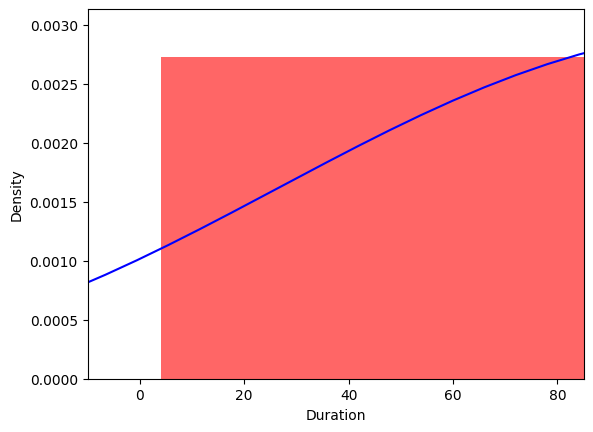

In [ ]:
ax = train_df["duration"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
train_df["duration"].plot(kind='density', color='blue')
ax.set(xlabel='Duration')
plt.xlim(-10,85)
plt.show()

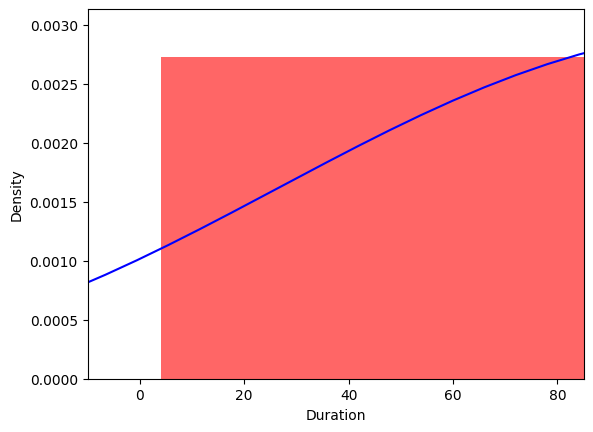

In [ ]:
ax = test_df["duration"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
test_df["duration"].plot(kind='density', color='blue')
ax.set(xlabel='Duration')
plt.xlim(-10,85)
plt.show()

####Upload Data Set

In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank.csv')

####Create a data frame called y_train with the land_type column from train_df.

In [ ]:
X1 = train_df.iloc[:,0:-1]
Y_train = train_df['Outcome']

####Create a data frame called y_train with the land_type column from test_df.

In [ ]:
X2 = test_df.iloc[:,0:-1]
Y_test = test_df['Outcome']

In [ ]:
X1.shape, X2.shape

((4521, 7), (4521, 7))

In [ ]:
X_train = X1

In [ ]:
X_train.head()

,job,day,month,duration,campaign,pdays,previous
0,unemployed,19,oct,79,1,-1,0
1,services,11,may,220,1,339,4
2,management,16,apr,185,1,330,1
3,management,3,jun,199,4,-1,0
4,blue-collar,5,may,226,1,-1,0


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

#### encode categorical variables with ordinal encoding

In [ ]:
encoder = ce.OrdinalEncoder(cols=['job', 'month', 'duration', 'pdays', 'previous'])
X_train = encoder.fit_transform(X_train)

####Building the Pipeline

In [ ]:
num_attribs = ['day', 'campaign']

In [ ]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

In [ ]:
random_forest = Pipeline([('transform', col_transform),('rf', RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True))])

####Fit the Model

In [ ]:
random_forest.fit(X1,np.ravel(Y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['day', 'campaign'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000))])

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

####Make your prediction

In [ ]:
y_pred = rfc.predict(X_train)

In [ ]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

duration    0.351916
day         0.196339
month       0.145384
job         0.115108
pdays       0.078297
campaign    0.073958
previous    0.038999
dtype: float64

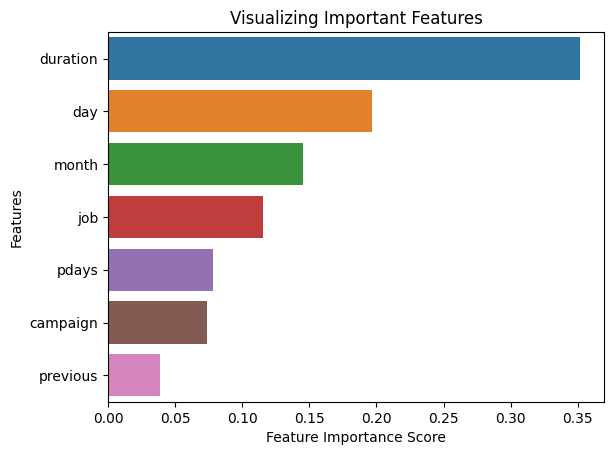

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



####Conclusion
The data set used was for portegese banking data that shows the precision, recall, f1-scorre, and accuracy to be the same for a data set that has a featured importance ranking that takes into account the duration of time a customer is with the bank as the most important factor to consider.  It greatly outweighs the importance compared to the rest of the features considered when determining a customers value to the bank.  